# Membuat Klasifikasi Data Gambar (Batu, Gunting, Kertas)




Nama: Eka Pramudianzah

Email: pramudianzah334@gmail.com

Tempat Tinggal: Kabupaten Tangerang, Banten

Alamat Github: https://github.com/pramudianzaheka92

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Download dataset serta membuat sebuah temporary dengan nama file zip
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip

--2021-06-25 14:09:31--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  11.5MB/s    in 38s     

2021-06-25 14:10:10 (8.15 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [5]:
# melakukan ekstraksi pada file zip
import zipfile,os
base_dir = '/tmp/rockpaperscissors/rps-cv-images'
local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [6]:
os.listdir('/tmp/rockpaperscissors')

['README_rpc-cv-images.txt', 'rps-cv-images', 'rock', 'scissors', 'paper']

In [7]:
# Split folder
!pip install split-folders
import splitfolders
splitfolders.ratio(base_dir, output = base_dir, seed = 1337, ratio = (.6, .4))

Copying files: 2188 files [00:00, 3802.39 files/s]


In [8]:
# Membuat direktori awal untuk data training dan data validasi"
train_dir = os.path.join(base_dir, "train")
val_dir = os.path.join(base_dir, "val")

# Memanggil file gambar yang ada di dalam folder images
data_train = os.path.join(base_dir, "rock")
data_validation = os.path.join(base_dir, "paper")
data_test = os.path.join(base_dir, "scissors")

In [9]:
from sklearn.model_selection import train_test_split

# Membuat direktori rock menjadi data train dan data validation
train_rock_dir, val_rock_dir = train_test_split(os.listdir(data_train), test_size = 0.4)

# Membuat direktori paper menjadi data train dan data validation
train_paper_dir, val_paper_dir = train_test_split(os.listdir(data_validation), test_size = 0.4)

# Membuat direktori scissors menjadi data train dan data validation
train_scissors_dir, val_scissors_dir = train_test_split(os.listdir(data_test), test_size = 0.4)

In [10]:
# Membuat direktori rock, paper, scissors pada direktori data training
data_train_rock = os.path.join(train_dir, "rock")
data_train_paper = os.path.join(train_dir, "paper")
data_train_scissors = os.path.join(train_dir, "scissors")

# Membuat direktori rock, paper, scissors pada direktori data validasi
data_validation_rock = os.path.join(val_dir, "rock")
data_validation_paper = os.path.join(val_dir, "paper")
data_validation_scissors = os.path.join(val_dir, "scissors")

In [11]:
# Membuat image data generator (preprocessing, pelabelan objek gambar & augmentasi gambar) untuk menyiapkan data training dan validation
# Langkah ini untuk proses augmentasi gambar agar menciptakan data-data baru dari data yang telah ada
from tensorflow.keras.preprocessing.image import ImageDataGenerator

data_train_generator = ImageDataGenerator(rescale=1./255,
                                          rotation_range=23,
                                          horizontal_flip=True,
                                          shear_range=0.2,
                                          fill_mode="nearest"
                                          )
data_val_generator = ImageDataGenerator(rescale=1./255,
                                          rotation_range=23,
                                          horizontal_flip=True,
                                          shear_range=0.2,
                                          fill_mode="nearest"
                                          )

In [12]:
# Memasukkan image data generator ke dalam variabel train_dir & validation_dir
train_generator = data_train_generator.flow_from_directory(train_dir, # Variabel data training
                                                           target_size=(100, 100), # Mengubah resolusi gambar menjadi 100 X 100 piksel
                                                           batch_size=32,
                                                           class_mode="categorical" # Karena kelas pada dataset terdapat 4 kelas (rock, paper & scissors) maka gunakan categorical
                                                           )
val_generator = data_val_generator.flow_from_directory(val_dir, # Variabel data validasi
                                                        target_size=(100, 100), # Mengubah resolusi gambar menjadi 100 X 100 piksel
                                                        batch_size=32,
                                                        class_mode="categorical" # Karena kelas pada dataset terdapat 4 kelas (rock, paper & scissors) maka gunakan categorical
                                                        )

Found 1312 images belonging to 3 classes.
Found 876 images belonging to 3 classes.


In [13]:
# Membuat arsitektur model CNN 2 Dimensi
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Sequential
from keras.optimizers import Adam
import tensorflow as tf
from keras.layers import Flatten, Conv2D, MaxPool2D

# Membuat jaringan syarat tiruan untuk model CNN
model = Sequential()
 
# Menambah layer CNN yang pertama
model.add(Conv2D(32, (3,3), activation="relu", input_shape=(100, 100, 3)))
model.add(MaxPool2D(2,2))
 
# Menambah layer CNN yang kedua
model.add(Conv2D(64, (3,3), activation="relu"))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.2))
 
# Menambah layer CNN yang ketiga
model.add(Conv2D(128, (3,3), activation="relu"))
model.add(MaxPool2D(2,2))
 
# Menambah layer CNN yang keempat
model.add(Conv2D(128, (3,3), activation="relu"))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.2))

model.add(Flatten())

# Membuat hidden layer
model.add(Dense(512, activation="relu"))

# Menambah layer output
model.add(Dense(3, activation="softmax"))

opt = Adam(lr=.001)
 
# Compile CNN dengan nilai opt, loss, dan matrics
model.compile(optimizer = opt, loss = "categorical_crossentropy", metrics=["accuracy"])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [14]:
history = model.fit(
    train_generator,
    steps_per_epoch =25,
    epochs = 20,
    validation_data = val_generator,
    validation_steps = 4,
    verbose = 2
)

Epoch 1/20
25/25 - 6s - loss: 1.0531 - accuracy: 0.4712 - val_loss: 0.9433 - val_accuracy: 0.5703
Epoch 2/20
25/25 - 4s - loss: 0.7255 - accuracy: 0.7175 - val_loss: 0.4832 - val_accuracy: 0.8203
Epoch 3/20
25/25 - 4s - loss: 0.3233 - accuracy: 0.8900 - val_loss: 0.2038 - val_accuracy: 0.9375
Epoch 4/20
25/25 - 4s - loss: 0.2619 - accuracy: 0.9025 - val_loss: 0.1761 - val_accuracy: 0.9141
Epoch 5/20
25/25 - 4s - loss: 0.2209 - accuracy: 0.9250 - val_loss: 0.1558 - val_accuracy: 0.9609
Epoch 6/20
25/25 - 4s - loss: 0.1970 - accuracy: 0.9388 - val_loss: 0.2940 - val_accuracy: 0.8828
Epoch 7/20
25/25 - 4s - loss: 0.2046 - accuracy: 0.9275 - val_loss: 0.1913 - val_accuracy: 0.9219
Epoch 8/20
25/25 - 4s - loss: 0.1528 - accuracy: 0.9513 - val_loss: 0.1663 - val_accuracy: 0.9453
Epoch 9/20
25/25 - 4s - loss: 0.1073 - accuracy: 0.9638 - val_loss: 0.0896 - val_accuracy: 0.9766
Epoch 10/20
25/25 - 4s - loss: 0.1351 - accuracy: 0.9550 - val_loss: 0.1197 - val_accuracy: 0.9844
Epoch 11/20
25/25 -

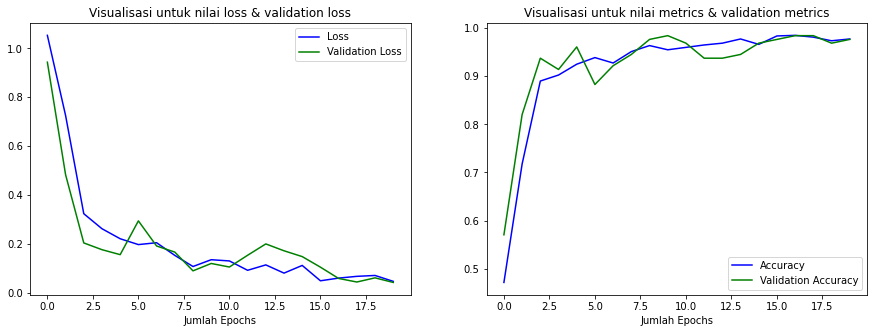

In [15]:
# Membuat visualisasi dari hasil neural network antara loss, validation loss dan akurasi, validation akurasi
plt.figure(figsize=(15,5))

# Membuat visualisasi untuk nilai loss dan validation loss
plt.subplot(1,2,1)
plt.plot(history.history['loss'], color="blue", label="Loss")
plt.plot(history.history['val_loss'], color="green", label="Validation Loss")
plt.title("Visualisasi untuk nilai loss & validation loss")
plt.xlabel("Jumlah Epochs")
plt.legend()

# Membuat visualisasi untuk nilai akurasi dan validation akurasi
plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], color="blue", label="Accuracy")
plt.plot(history.history['val_accuracy'], color="green", label="Validation Accuracy")
plt.title("Visualisasi untuk nilai metrics & validation metrics")
plt.xlabel("Jumlah Epochs")
plt.legend()
plt.show()

In [16]:
from google.colab import files
from keras.preprocessing import image
import matplotlib.image as mpimg
%matplotlib inline
 
uploaded = files.upload()

Saving Gunting.png to Gunting (1).png


Gunting.png
scissors


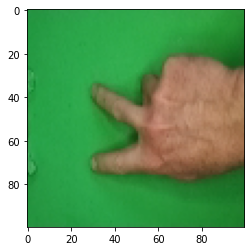

In [17]:
for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(100, 100))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
 
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  
  print(fn)
  if classes[0, 0]==1:
    print("rock")
  elif classes [0, 1]==1:
    print("paper")
  else:
    print("scissors")